# 📊 **01 - Preparação e Análise Exploratória dos Dados**

**Objetivo:** Preparar e analisar o dataset PlantVillage para detecção de doenças em folhas.

**O que este notebook faz:**
• Carrega e organiza 15 classes de plantas (Tomato, Potato, Pepper)
• Analisa a distribuição de imagens por espécie e condição
• Visualiza amostras de cada classe
• Define constantes e funções para uso nos próximos notebooks
• Cria estrutura de dados para treinamento dos modelos

**Saída:** Dataset organizado e mapeamento de classes para os próximos passos.

In [1]:
#Importação das bibliotecas necessárias

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import Counter, defaultdict
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_palette("husl")

print("✅ Bibliotecas importadas com sucesso!")

✅ Bibliotecas importadas com sucesso!


In [2]:
#Definição de paths e constantes do projeto

# BASE_PATH = '/home/gustavo/personal/leaf-disease-detector/PlantVillage'
BASE_PATH = '/home/gustavo/ceub/TCC/leaf-disease-detector/PlantVillage'

# Verificar se o caminho existe
if os.path.exists(BASE_PATH):
    print(f"✅ Caminho base encontrado: {BASE_PATH}")
else:
    print(f"❌ Erro: Caminho não encontrado: {BASE_PATH}")

# Listar todas as pastas disponíveis
pastas_disponiveis = [folder for folder in os.listdir(BASE_PATH) 
                     if os.path.isdir(os.path.join(BASE_PATH, folder))]

print(f"\n📁 Pastas encontradas ({len(pastas_disponiveis)}):")
for pasta in sorted(pastas_disponiveis):
    print(f"  - {pasta}")

✅ Caminho base encontrado: /home/gustavo/ceub/TCC/leaf-disease-detector/PlantVillage

📁 Pastas encontradas (15):
  - Pepper__bell___Bacterial_spot
  - Pepper__bell___healthy
  - Potato___Early_blight
  - Potato___Late_blight
  - Potato___healthy
  - Tomato_Bacterial_spot
  - Tomato_Early_blight
  - Tomato_Late_blight
  - Tomato_Leaf_Mold
  - Tomato_Septoria_leaf_spot
  - Tomato_Spider_mites_Two_spotted_spider_mite
  - Tomato__Target_Spot
  - Tomato__Tomato_YellowLeaf__Curl_Virus
  - Tomato__Tomato_mosaic_virus
  - Tomato_healthy


In [3]:
#Classificação das pastas por espécie
#Identificar automaticamente as espécies baseado nos nomes das pastas

especies_identificadas = {
    'Tomato': [],
    'Potato': [], 
    'Pepper_bell': []
}

# Classificar cada pasta pela espécie
for pasta in pastas_disponiveis:
    if pasta.startswith('Tomato'):
        especies_identificadas['Tomato'].append(pasta)
    elif pasta.startswith('Potato'):
        especies_identificadas['Potato'].append(pasta)
    elif pasta.startswith('Pepper'):
        especies_identificadas['Pepper_bell'].append(pasta)

# Mostrar a classificação
print("🌿 CLASSIFICAÇÃO POR ESPÉCIES:")
print("=" * 50)
for especie, pastas in especies_identificadas.items():
    print(f"\n{especie.upper()} ({len(pastas)} classes):")
    for pasta in sorted(pastas):
        print(f"  - {pasta}")

🌿 CLASSIFICAÇÃO POR ESPÉCIES:

TOMATO (10 classes):
  - Tomato_Bacterial_spot
  - Tomato_Early_blight
  - Tomato_Late_blight
  - Tomato_Leaf_Mold
  - Tomato_Septoria_leaf_spot
  - Tomato_Spider_mites_Two_spotted_spider_mite
  - Tomato__Target_Spot
  - Tomato__Tomato_YellowLeaf__Curl_Virus
  - Tomato__Tomato_mosaic_virus
  - Tomato_healthy

POTATO (3 classes):
  - Potato___Early_blight
  - Potato___Late_blight
  - Potato___healthy

PEPPER_BELL (2 classes):
  - Pepper__bell___Bacterial_spot
  - Pepper__bell___healthy


In [4]:
#Contagem de imagens por classe
print("📊 CONTANDO IMAGENS POR CLASSE...")

# Extensões de imagem aceitas
extensoes_validas = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')

# Dicionário para armazenar contagens
contagem_detalhada = {}
contagem_por_especie = {}

for especie, pastas in especies_identificadas.items():
    print(f"\n🔍 Analisando {especie}:")
    contagem_por_especie[especie] = 0
    contagem_detalhada[especie] = {}
    
    for pasta in pastas:
        caminho_pasta = os.path.join(BASE_PATH, pasta)
        if os.path.exists(caminho_pasta):
            # Contar arquivos de imagem
            arquivos = os.listdir(caminho_pasta)
            imagens = [f for f in arquivos if f.lower().endswith(extensoes_validas)]
            num_imagens = len(imagens)
            
            contagem_detalhada[especie][pasta] = num_imagens
            contagem_por_especie[especie] += num_imagens
            
            print(f"  {pasta}: {num_imagens} imagens")
        else:
            print(f"  ❌ Pasta não encontrada: {pasta}")

print(f"\n📈 RESUMO GERAL:")
total_geral = sum(contagem_por_especie.values())
for especie, total in contagem_por_especie.items():
    porcentagem = (total/total_geral)*100
    print(f"  {especie}: {total} imagens ({porcentagem:.1f}%)")

print(f"\n🎯 TOTAL GERAL: {total_geral} imagens")

📊 CONTANDO IMAGENS POR CLASSE...

🔍 Analisando Tomato:
  Tomato_Bacterial_spot: 2127 imagens
  Tomato_Spider_mites_Two_spotted_spider_mite: 1676 imagens
  Tomato_Late_blight: 1909 imagens
  Tomato__Tomato_YellowLeaf__Curl_Virus: 3208 imagens
  Tomato__Target_Spot: 1404 imagens
  Tomato_Early_blight: 1000 imagens
  Tomato__Tomato_mosaic_virus: 373 imagens
  Tomato_healthy: 1591 imagens
  Tomato_Septoria_leaf_spot: 1771 imagens
  Tomato_Leaf_Mold: 952 imagens

🔍 Analisando Potato:
  Potato___Early_blight: 1000 imagens
  Potato___healthy: 152 imagens
  Potato___Late_blight: 1000 imagens

🔍 Analisando Pepper_bell:
  Pepper__bell___Bacterial_spot: 997 imagens
  Pepper__bell___healthy: 1478 imagens

📈 RESUMO GERAL:
  Tomato: 16011 imagens (77.6%)
  Potato: 2152 imagens (10.4%)
  Pepper_bell: 2475 imagens (12.0%)

🎯 TOTAL GERAL: 20638 imagens


In [5]:
#Criação de DataFrame para análise

print("📋 CRIANDO DATAFRAME PARA ANÁLISE...")

# Lista para armazenar dados
dados_analise = []

for especie, classes in contagem_detalhada.items():
    for classe, num_imagens in classes.items():
        # Extrair informação de saúde da classe
        if 'healthy' in classe.lower():
            condicao = 'Healthy'
        else:
            # Extrair nome da doença
            partes = classe.split('_')
            if len(partes) > 1:
                condicao = '_'.join(partes[1:])  # Pegar tudo depois da espécie
            else:
                condicao = 'Unknown'
        
        dados_analise.append({
            'Especie': especie,
            'Classe_Completa': classe,
            'Condicao': condicao,
            'Num_Imagens': num_imagens
        })

# Criar DataFrame
df_analise = pd.DataFrame(dados_analise)

print("✅ DataFrame criado!")
print(f"📊 Shape: {df_analise.shape}")
print("\n👀 Primeiras linhas:")
df_analise.head(10)

📋 CRIANDO DATAFRAME PARA ANÁLISE...
✅ DataFrame criado!
📊 Shape: (15, 4)

👀 Primeiras linhas:


Especie                              Classe_Completa  \
0  Tomato                        Tomato_Bacterial_spot   
1  Tomato  Tomato_Spider_mites_Two_spotted_spider_mite   
2  Tomato                           Tomato_Late_blight   
3  Tomato        Tomato__Tomato_YellowLeaf__Curl_Virus   
4  Tomato                          Tomato__Target_Spot   
5  Tomato                          Tomato_Early_blight   
6  Tomato                  Tomato__Tomato_mosaic_virus   
7  Tomato                               Tomato_healthy   
8  Tomato                    Tomato_Septoria_leaf_spot   
9  Tomato                             Tomato_Leaf_Mold   

                               Condicao  Num_Imagens  
0                        Bacterial_spot         2127  
1  Spider_mites_Two_spotted_spider_mite         1676  
2                           Late_blight         1909  
3        _Tomato_YellowLeaf__Curl_Virus         3208  
4                          _Target_Spot         1404  
5                          Early_blight         1000  
6                  _Tomato_mosaic_virus          373  
7                               Healthy         1591  
8                    Septoria_leaf_spot         1771  
9                             Leaf_Mold          952

In [6]:
#Análise estatística por espécie

print("📈 ANÁLISE ESTATÍSTICA POR ESPÉCIE")

for especie in ['Tomato', 'Potato', 'Pepper_bell']:
    dados_especie = df_analise[df_analise['Especie'] == especie]
    
    print(f"\n🌿 {especie.upper()}:")
    print(f"  Total de classes: {len(dados_especie)}")
    print(f"  Total de imagens: {dados_especie['Num_Imagens'].sum()}")
    print(f"  Média por classe: {dados_especie['Num_Imagens'].mean():.1f}")
    print(f"  Mediana por classe: {dados_especie['Num_Imagens'].median():.1f}")
    print(f"  Desvio padrão: {dados_especie['Num_Imagens'].std():.1f}")
    print(f"  Min-Max: {dados_especie['Num_Imagens'].min()} - {dados_especie['Num_Imagens'].max()}")
    
    # Classes com menos imagens (possível desbalanceamento)
    classes_pequenas = dados_especie[dados_especie['Num_Imagens'] < dados_especie['Num_Imagens'].mean()]
    if len(classes_pequenas) > 0:
        print(f"  ⚠️  Classes com poucas imagens:")
        for _, row in classes_pequenas.iterrows():
            print(f"    - {row['Classe_Completa']}: {row['Num_Imagens']} imagens")

📈 ANÁLISE ESTATÍSTICA POR ESPÉCIE

🌿 TOMATO:
  Total de classes: 10
  Total de imagens: 16011
  Média por classe: 1601.1
  Mediana por classe: 1633.5
  Desvio padrão: 768.7
  Min-Max: 373 - 3208
  ⚠️  Classes com poucas imagens:
    - Tomato__Target_Spot: 1404 imagens
    - Tomato_Early_blight: 1000 imagens
    - Tomato__Tomato_mosaic_virus: 373 imagens
    - Tomato_healthy: 1591 imagens
    - Tomato_Leaf_Mold: 952 imagens

🌿 POTATO:
  Total de classes: 3
  Total de imagens: 2152
  Média por classe: 717.3
  Mediana por classe: 1000.0
  Desvio padrão: 489.6
  Min-Max: 152 - 1000
  ⚠️  Classes com poucas imagens:
    - Potato___healthy: 152 imagens

🌿 PEPPER_BELL:
  Total de classes: 2
  Total de imagens: 2475
  Média por classe: 1237.5
  Mediana por classe: 1237.5
  Desvio padrão: 340.1
  Min-Max: 997 - 1478
  ⚠️  Classes com poucas imagens:
    - Pepper__bell___Bacterial_spot: 997 imagens


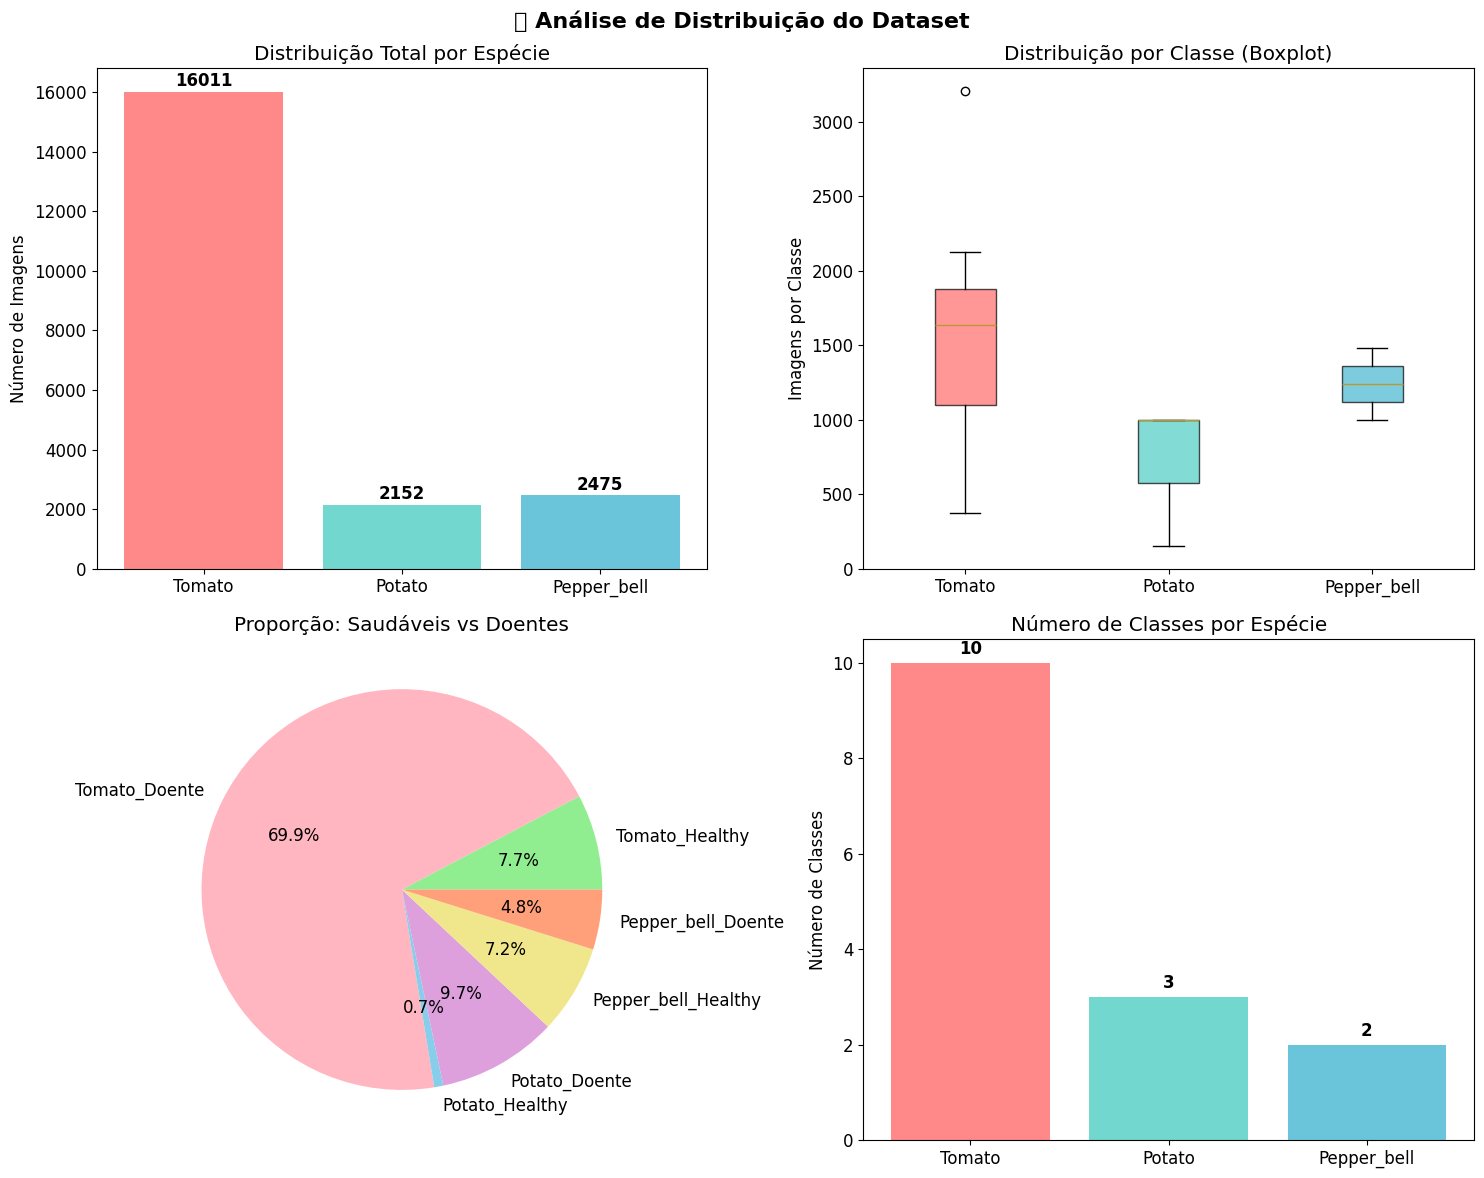

In [7]:
#Visualização - Distribuição por espécie

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('📊 Análise de Distribuição do Dataset', fontsize=16, fontweight='bold')

# 1. Distribuição geral por espécie
ax1 = axes[0, 0]
especies = list(contagem_por_especie.keys())
contagens = list(contagem_por_especie.values())
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

bars = ax1.bar(especies, contagens, color=colors, alpha=0.8)
ax1.set_title('Distribuição Total por Espécie')
ax1.set_ylabel('Número de Imagens')

# Adicionar valores nas barras
for bar, valor in zip(bars, contagens):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
             f'{valor}', ha='center', va='bottom', fontweight='bold')

# 2. Distribuição por classe dentro de cada espécie
ax2 = axes[0, 1]
df_grouped = df_analise.groupby('Especie')['Num_Imagens'].apply(list)
box_data = [df_grouped[especie] for especie in especies]
bp = ax2.boxplot(box_data, labels=especies, patch_artist=True)

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax2.set_title('Distribuição por Classe (Boxplot)')
ax2.set_ylabel('Imagens por Classe')

# 3. Proporção Healthy vs Doentes
ax3 = axes[1, 0]
proporcoes = []
labels_prop = []

for especie in especies:
    dados_especie = df_analise[df_analise['Especie'] == especie]
    healthy = dados_especie[dados_especie['Condicao'] == 'Healthy']['Num_Imagens'].sum()
    total = dados_especie['Num_Imagens'].sum()
    doentes = total - healthy
    
    proporcoes.extend([healthy, doentes])
    labels_prop.extend([f'{especie}_Healthy', f'{especie}_Doente'])

# Criar gráfico de pizza
wedges, texts, autotexts = ax3.pie(proporcoes, labels=labels_prop, autopct='%1.1f%%',
                                  colors=['#90EE90', '#FFB6C1', '#87CEEB', '#DDA0DD', '#F0E68C', '#FFA07A'])
ax3.set_title('Proporção: Saudáveis vs Doentes')

# 4. Número de classes por espécie
ax4 = axes[1, 1]
num_classes = [len(df_analise[df_analise['Especie'] == esp]) for esp in especies]
bars4 = ax4.bar(especies, num_classes, color=colors, alpha=0.8)
ax4.set_title('Número de Classes por Espécie')
ax4.set_ylabel('Número de Classes')

for bar, valor in zip(bars4, num_classes):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             f'{valor}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

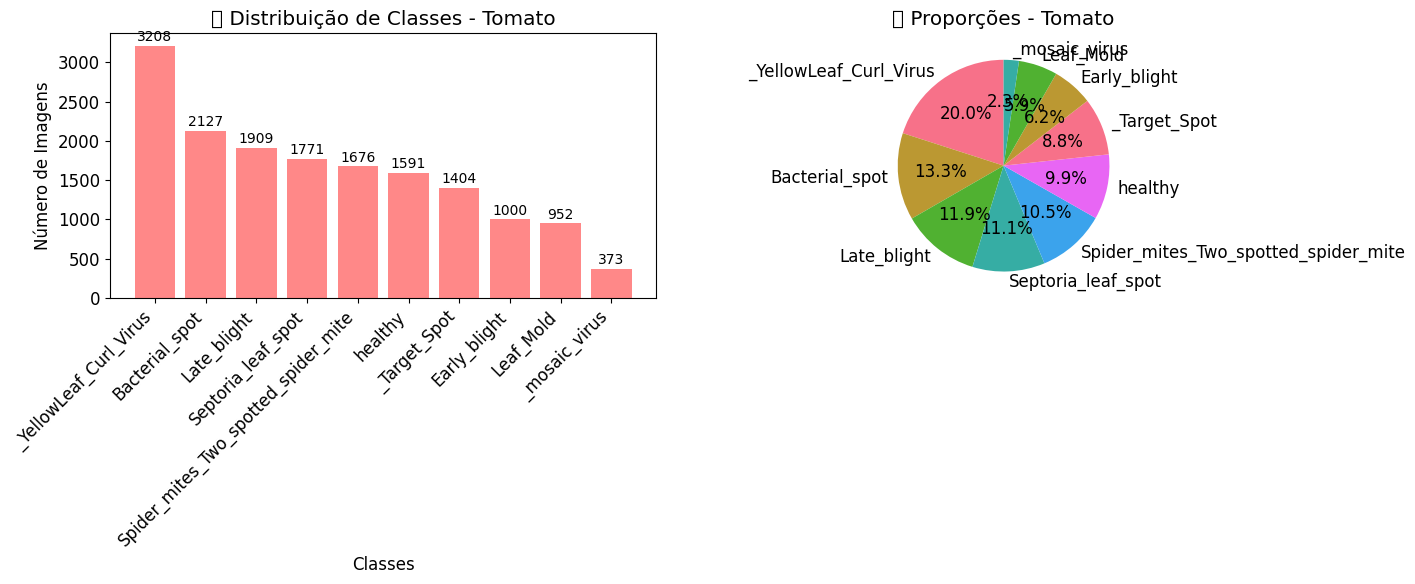


📋 RESUMO DETALHADO - Tomato:
----------------------------------------
  Tomato__Tomato_YellowLeaf__Curl_Virus: 3208 imagens (20.0%)
  Tomato_Bacterial_spot: 2127 imagens (13.3%)
  Tomato_Late_blight: 1909 imagens (11.9%)
  Tomato_Septoria_leaf_spot: 1771 imagens (11.1%)
  Tomato_Spider_mites_Two_spotted_spider_mite: 1676 imagens (10.5%)
  Tomato_healthy: 1591 imagens (9.9%)
  Tomato__Target_Spot: 1404 imagens (8.8%)
  Tomato_Early_blight: 1000 imagens (6.2%)
  Tomato_Leaf_Mold: 952 imagens (5.9%)
  Tomato__Tomato_mosaic_virus: 373 imagens (2.3%)


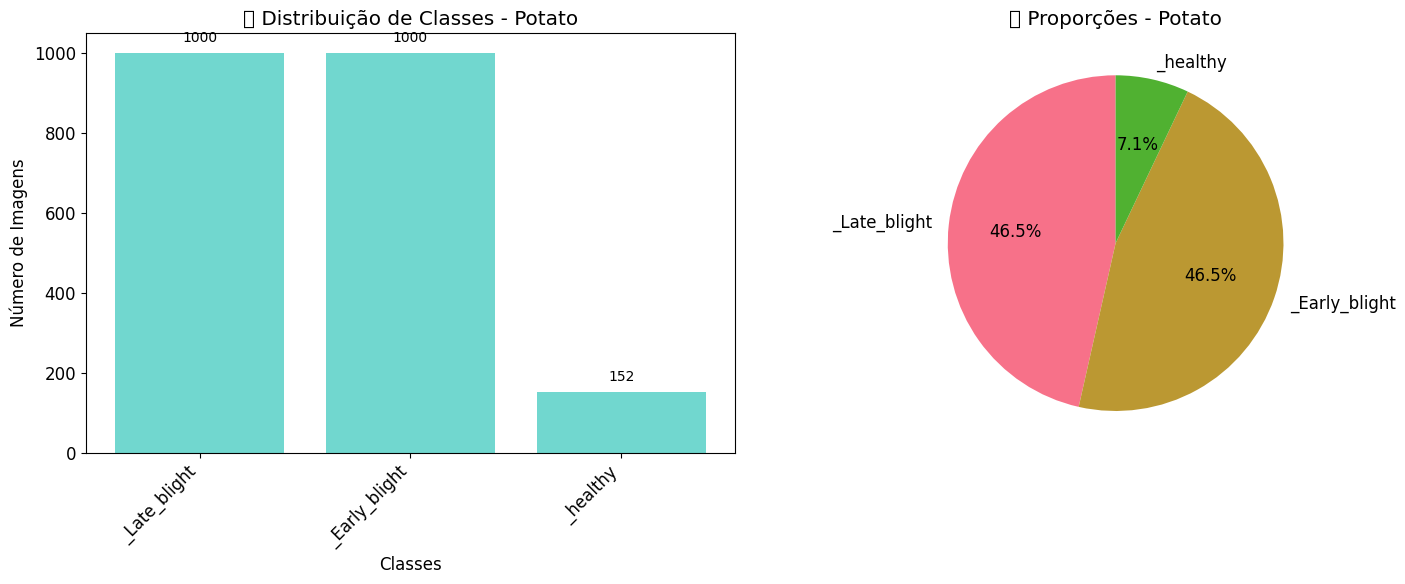


📋 RESUMO DETALHADO - Potato:
----------------------------------------
  Potato___Late_blight: 1000 imagens (46.5%)
  Potato___Early_blight: 1000 imagens (46.5%)
  Potato___healthy: 152 imagens (7.1%)


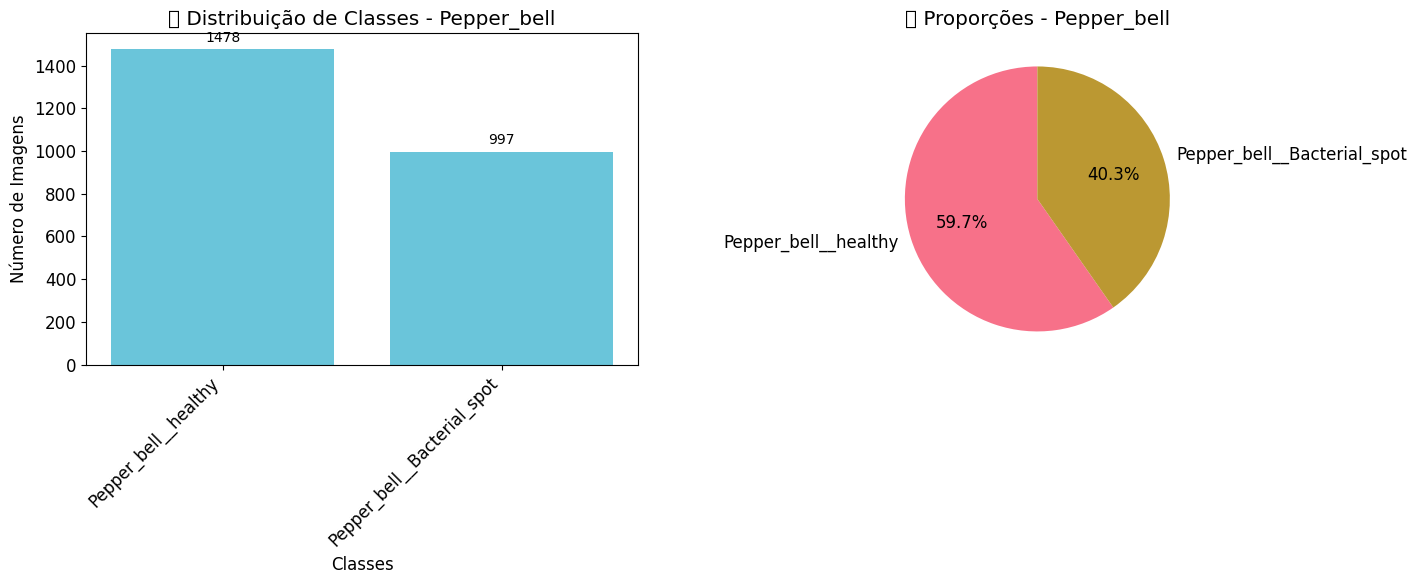


📋 RESUMO DETALHADO - Pepper_bell:
----------------------------------------
  Pepper__bell___healthy: 1478 imagens (59.7%)
  Pepper__bell___Bacterial_spot: 997 imagens (40.3%)


In [8]:
# BLOCO 8: Visualização detalhada por espécie
for especie in ['Tomato', 'Potato', 'Pepper_bell']:
    dados_especie = df_analise[df_analise['Especie'] == especie]
    
    plt.figure(figsize=(15, 6))
    
    # Gráfico de barras para cada classe
    plt.subplot(1, 2, 1)
    classes = dados_especie['Classe_Completa'].values
    contagens = dados_especie['Num_Imagens'].values
    
    # Ordenar por número de imagens
    indices_ordenados = np.argsort(contagens)[::-1]
    classes_ordenadas = classes[indices_ordenados]
    contagens_ordenadas = contagens[indices_ordenados]
    
    bars = plt.bar(range(len(classes_ordenadas)), contagens_ordenadas, 
                   color=colors[list(especies).index(especie)], alpha=0.8)
    
    plt.title(f'📊 Distribuição de Classes - {especie}')
    plt.xlabel('Classes')
    plt.ylabel('Número de Imagens')
    plt.xticks(range(len(classes_ordenadas)), 
               [classe.replace(f'{especie}_', '').replace('__', '_') 
                for classe in classes_ordenadas], 
               rotation=45, ha='right')
    
    # Adicionar valores nas barras
    for i, (bar, valor) in enumerate(zip(bars, contagens_ordenadas)):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20,
                f'{valor}', ha='center', va='bottom', fontsize=10)
    
    # Gráfico de pizza para proporções
    plt.subplot(1, 2, 2)
    labels_pie = [classe.replace(f'{especie}_', '').replace('__', '_') 
                  for classe in classes_ordenadas]
    
    plt.pie(contagens_ordenadas, labels=labels_pie, autopct='%1.1f%%', 
            startangle=90)
    plt.title(f'🥧 Proporções - {especie}')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n📋 RESUMO DETALHADO - {especie}:")
    print("-" * 40)
    for classe, contagem in zip(classes_ordenadas, contagens_ordenadas):
        porcentagem = (contagem / contagens_ordenadas.sum()) * 100
        print(f"  {classe}: {contagem} imagens ({porcentagem:.1f}%)")

🖼️ VISUALIZANDO AMOSTRAS DE IMAGENS


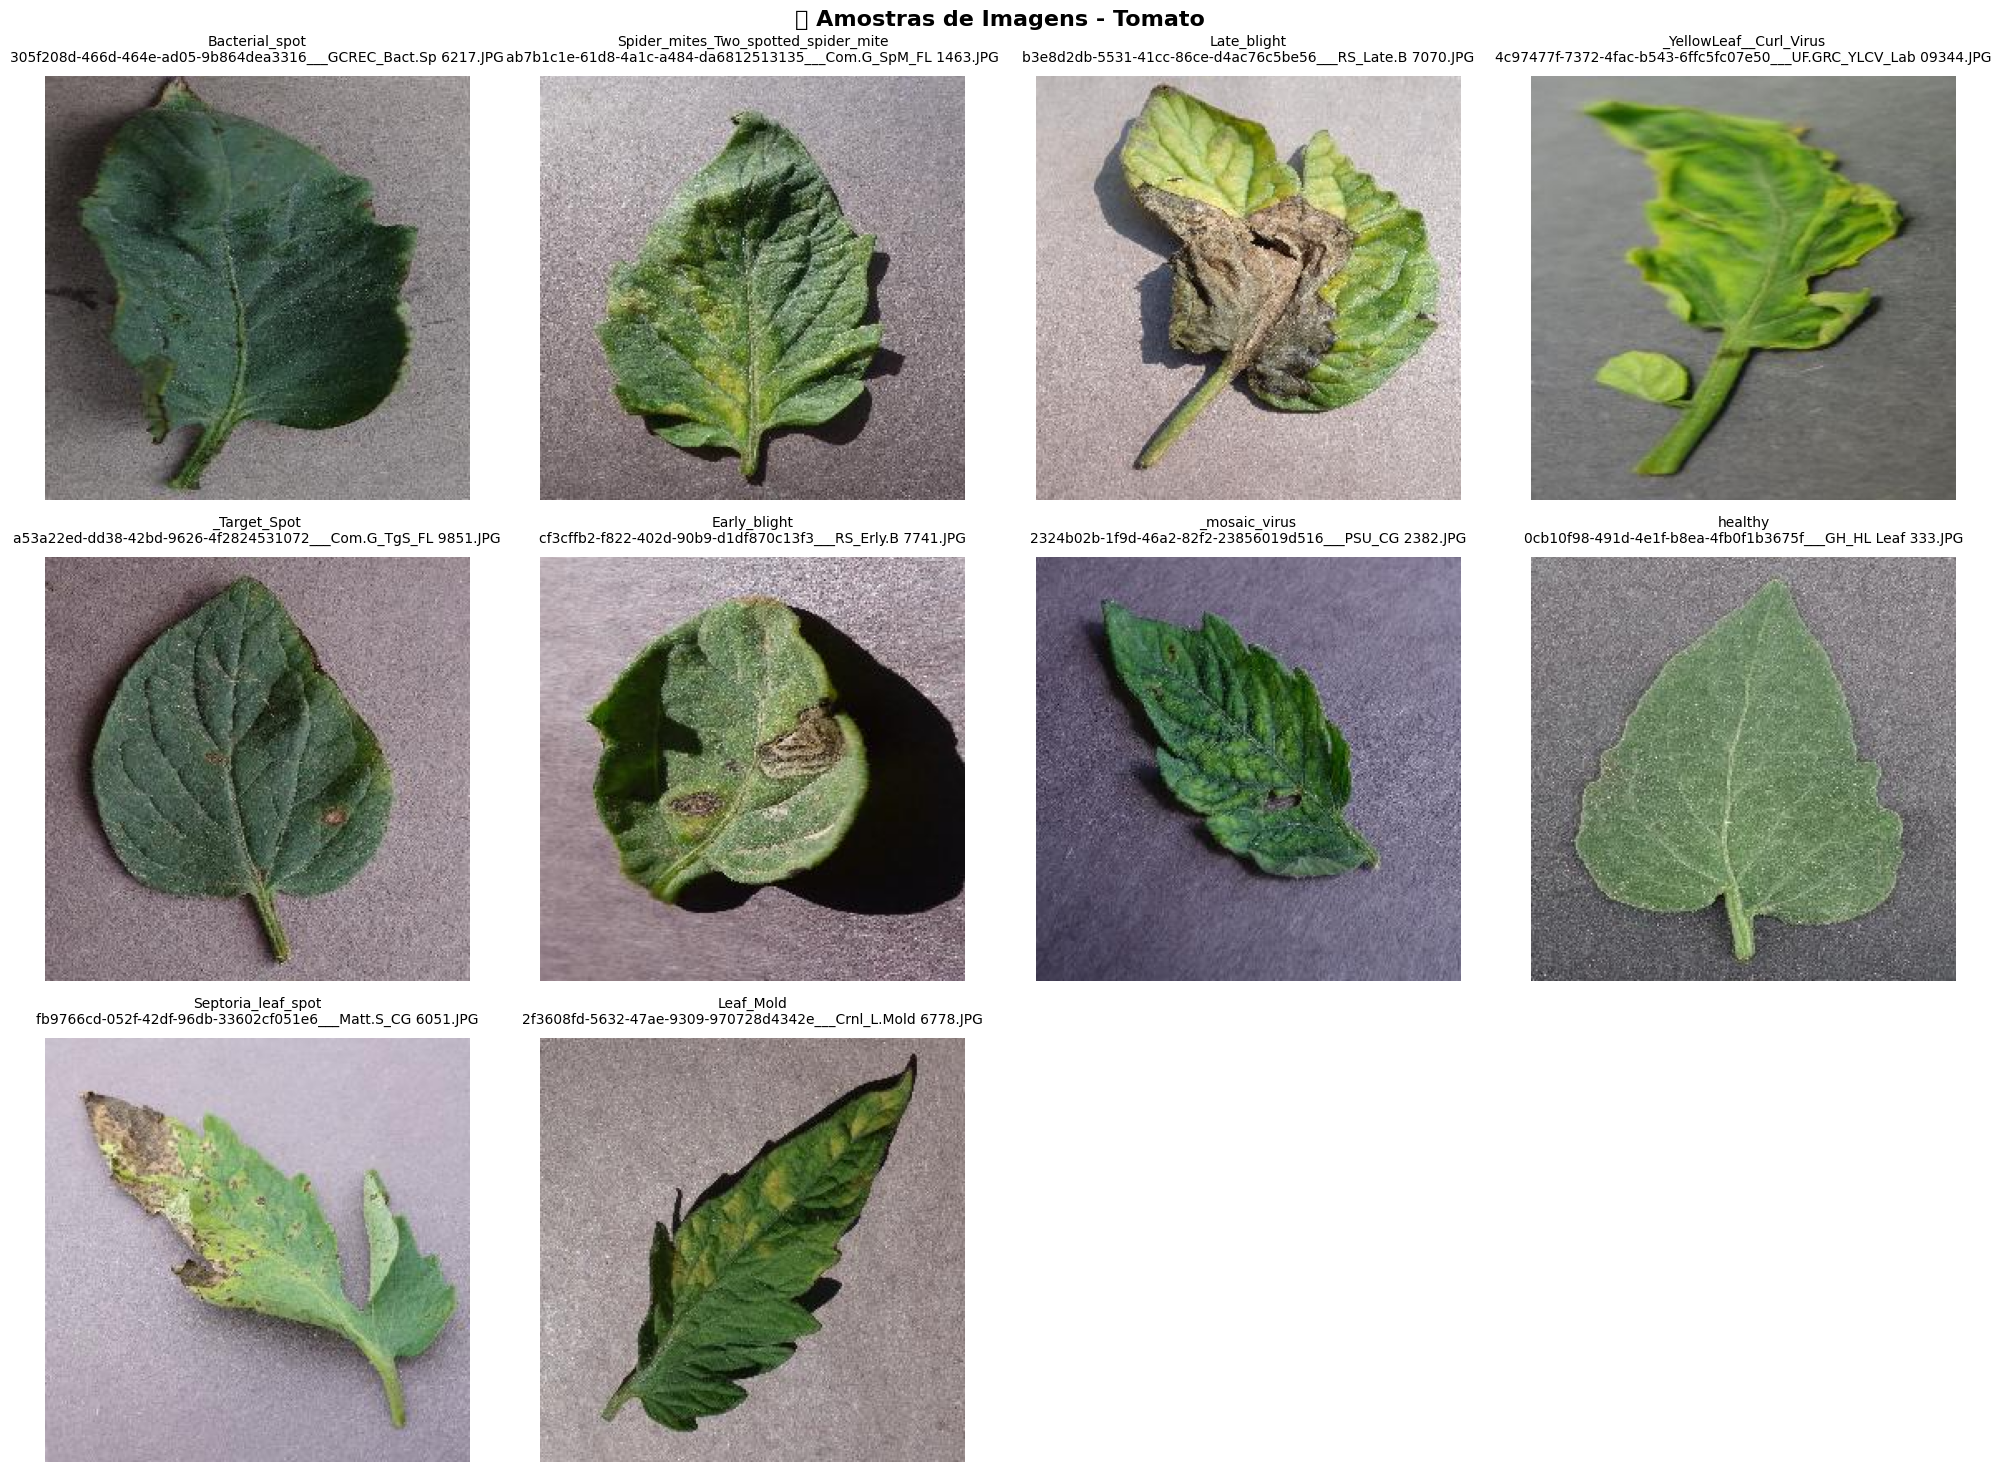

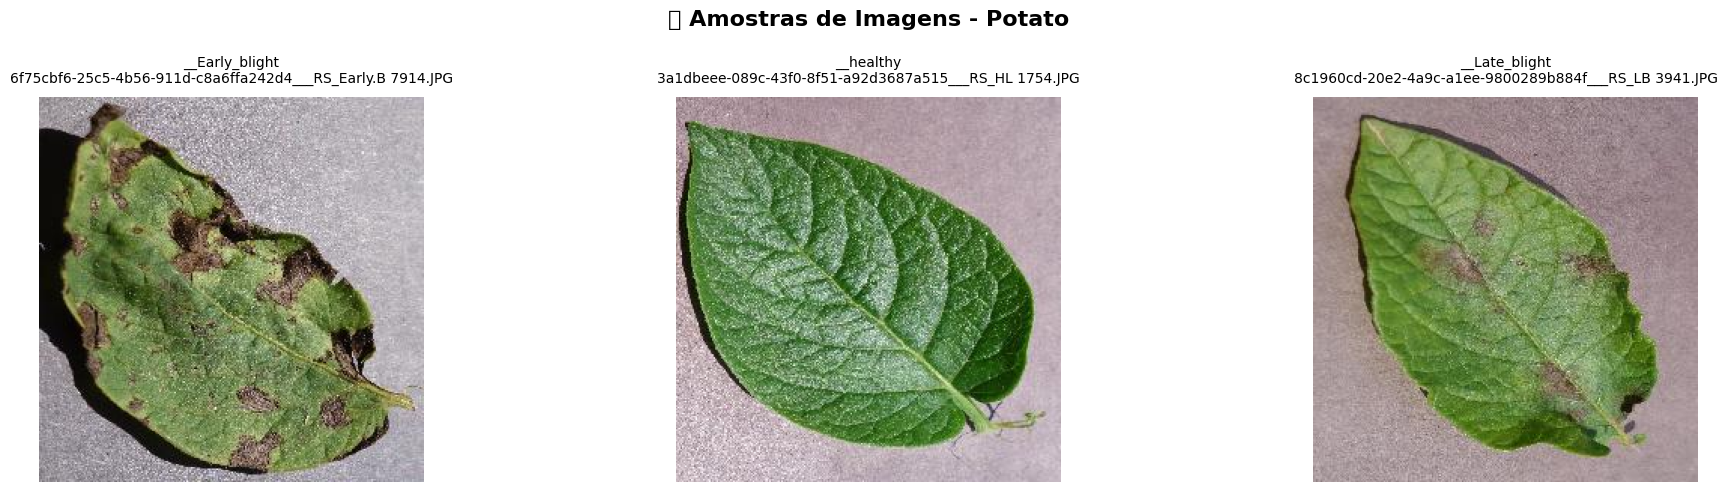

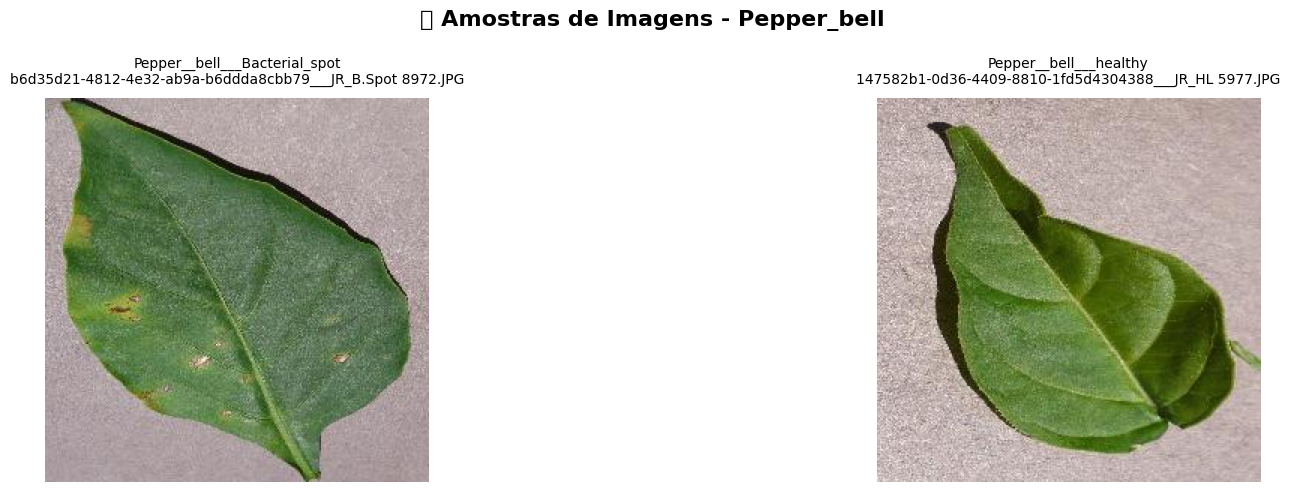

In [9]:
#Visualização de amostras de imagens

print("🖼️ VISUALIZANDO AMOSTRAS DE IMAGENS")

# Função para carregar e redimensionar imagem
def carregar_imagem_amostra(caminho_pasta, max_tentativas=5):
    """Carrega uma imagem aleatória da pasta"""
    arquivos = [f for f in os.listdir(caminho_pasta) 
                if f.lower().endswith(extensoes_validas)]
    
    for _ in range(max_tentativas):
        if arquivos:
            arquivo_escolhido = np.random.choice(arquivos)
            caminho_completo = os.path.join(caminho_pasta, arquivo_escolhido)
            try:
                img = Image.open(caminho_completo)
                img = img.convert('RGB')
                return np.array(img), arquivo_escolhido
            except Exception as e:
                print(f"Erro ao carregar {arquivo_escolhido}: {e}")
                continue
    return None, None

# Visualizar amostras de cada espécie
for especie in ['Tomato', 'Potato', 'Pepper_bell']:
    classes_especie = [pasta for pasta in especies_identificadas[especie]]
    
    # Calcular grid size
    num_classes = len(classes_especie)
    cols = min(4, num_classes)
    rows = (num_classes + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(20, 5*rows))
    fig.suptitle(f'🌿 Amostras de Imagens - {especie}', fontsize=16, fontweight='bold')
    
    # Garantir que axes seja sempre um array 2D
    if rows == 1 and cols == 1:
        axes = np.array([[axes]])
    elif rows == 1:
        axes = axes.reshape(1, -1)
    elif cols == 1:
        axes = axes.reshape(-1, 1)
    
    for idx, classe in enumerate(classes_especie):
        row = idx // cols
        col = idx % cols
        
        # Acessar o axes correto
        if rows == 1:
            ax = axes[0, col]
        elif cols == 1:
            ax = axes[row, 0]
        else:
            ax = axes[row, col]
        
        caminho_pasta = os.path.join(BASE_PATH, classe)
        img, nome_arquivo = carregar_imagem_amostra(caminho_pasta)
        
        if img is not None:
            ax.imshow(img)
            ax.set_title(f'{classe.replace(f"{especie}_", "")}\n{nome_arquivo}', 
                        fontsize=10, pad=10)
        else:
            ax.text(0.5, 0.5, 'Erro ao\ncarregar imagem', 
                   ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f'{classe.replace(f"{especie}_", "")}', fontsize=10)
        
        ax.axis('off')
    
    # Ocultar eixos vazios
    for idx in range(num_classes, rows * cols):
        row = idx // cols
        col = idx % cols
        
        if rows == 1:
            ax = axes[0, col]
        elif cols == 1:
            ax = axes[row, 0]
        else:
            ax = axes[row, col]
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

🔍 ANÁLISE DE QUALIDADE DAS IMAGENS

📊 Estatísticas das dimensões (baseado em 60 imagens):
Largura - Média: 256.0, Min: 256, Max: 256
Altura - Média: 256.0, Min: 256, Max: 256
Canais - Único: [3]


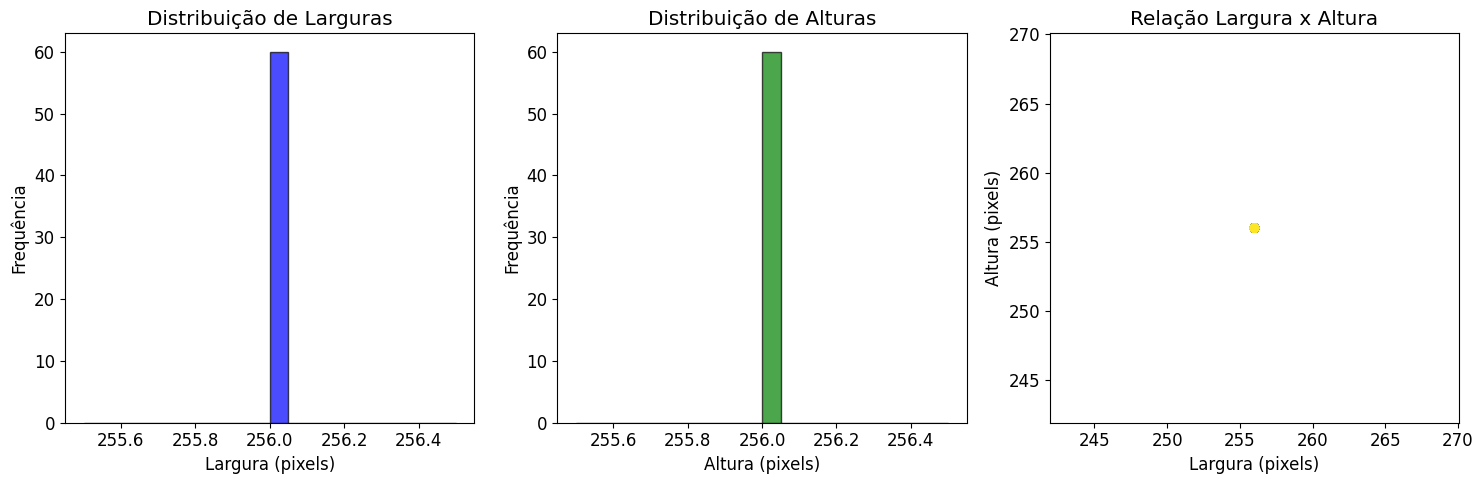

In [10]:
#Análise de qualidade das imagens

print("🔍 ANÁLISE DE QUALIDADE DAS IMAGENS")
# Analisar algumas imagens de cada espécie para entender dimensões
dimensoes_imagens = {'width': [], 'height': [], 'channels': [], 'especie': [], 'classe': []}

for especie, classes in especies_identificadas.items():
    
    for classe in classes[:2]:  # Analisar apenas 2 classes por espécie para ser rápido
        caminho_pasta = os.path.join(BASE_PATH, classe)
        arquivos = [f for f in os.listdir(caminho_pasta) 
                   if f.lower().endswith(extensoes_validas)]
        
        # Analisar até 10 imagens por classe
        for arquivo in arquivos[:10]:
            try:
                img = Image.open(os.path.join(caminho_pasta, arquivo))
                width, height = img.size
                channels = len(img.getbands())
                
                dimensoes_imagens['width'].append(width)
                dimensoes_imagens['height'].append(height)
                dimensoes_imagens['channels'].append(channels)
                dimensoes_imagens['especie'].append(especie)
                dimensoes_imagens['classe'].append(classe)
                
            except Exception as e:
                print(f"  ❌ Erro em {arquivo}: {e}")

# Criar DataFrame das dimensões
df_dimensoes = pd.DataFrame(dimensoes_imagens)

print(f"\n📊 Estatísticas das dimensões (baseado em {len(df_dimensoes)} imagens):")
print(f"Largura - Média: {df_dimensoes['width'].mean():.1f}, Min: {df_dimensoes['width'].min()}, Max: {df_dimensoes['width'].max()}")
print(f"Altura - Média: {df_dimensoes['height'].mean():.1f}, Min: {df_dimensoes['height'].min()}, Max: {df_dimensoes['height'].max()}")
print(f"Canais - Único: {df_dimensoes['channels'].unique()}")

# Visualizar distribuição de dimensões
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df_dimensoes['width'], bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribuição de Larguras')
plt.xlabel('Largura (pixels)')
plt.ylabel('Frequência')

plt.subplot(1, 3, 2)
plt.hist(df_dimensoes['height'], bins=20, alpha=0.7, color='green', edgecolor='black')
plt.title('Distribuição de Alturas')
plt.xlabel('Altura (pixels)')
plt.ylabel('Frequência')

plt.subplot(1, 3, 3)
plt.scatter(df_dimensoes['width'], df_dimensoes['height'], alpha=0.6, c=df_dimensoes['especie'].factorize()[0])
plt.title('Relação Largura x Altura')
plt.xlabel('Largura (pixels)')
plt.ylabel('Altura (pixels)')

plt.tight_layout()
plt.show()